In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 先导入数据分析一波  
data = pd.read_csv('./housing.csv')
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## 数据特征解释   
* RM代表房子的平均房间数量     
* LSTAT代表该区域中低收入阶层的比例   
* PTRATIO代表镇上学生和教师数量的比例，一定程度上也能反应当地的贫富情况    
* MEDV代表当地房价    

In [12]:
# 特征可视化   
features = np.array(data.drop('MEDV', axis=1))
prices = np.array(data['MEDV'])
print(features.shape, prices.shape)

(489, 3) (489,)


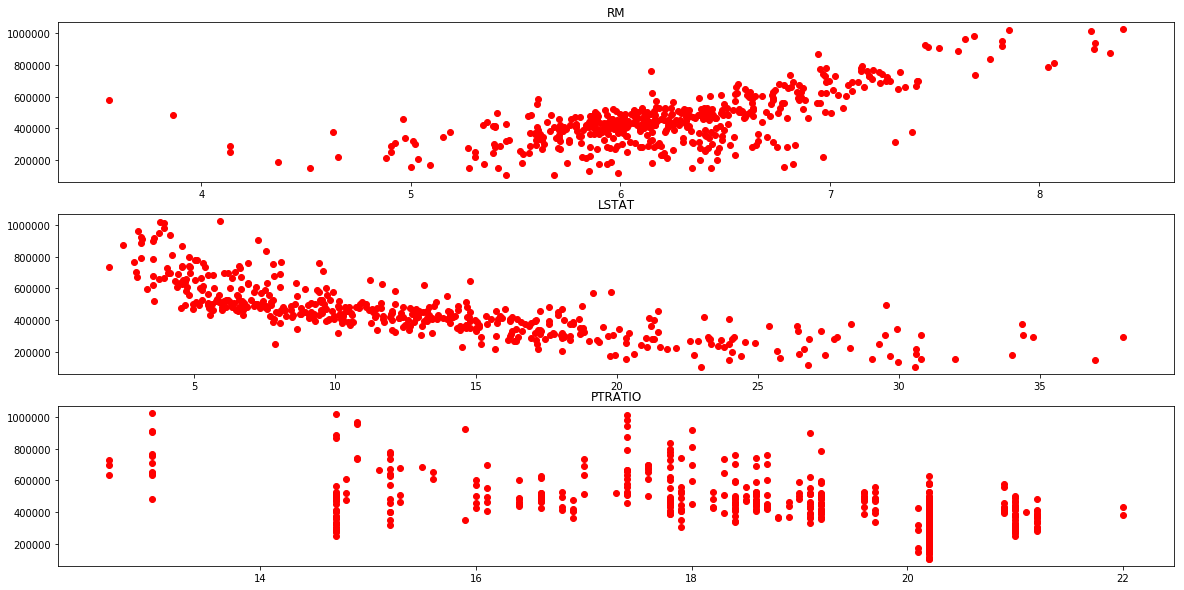

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.title('RM')
plt.scatter(features[:, 0], prices, color='r')
plt.subplot(3, 1, 2)
plt.title('LSTAT')
plt.scatter(features[:, 1], prices, color='r')
plt.subplot(3, 1, 3)
plt.title('PTRATIO')
plt.scatter(features[:, 2], prices, color='r')
plt.show()

可以看出三个特征与房价都有一定的线性关系

## 训练数据测试数据准备

In [31]:
# train test split  

def train_test_split(X, y, radio=0.2):
    # 先给定随机种子
    np.random.seed(555)
    # 乱序index
    index = np.random.permutation(len(data))
    test_size = int(len(X) * radio)
    test_index = index[:test_size]
    train_index = index[test_size:]
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(features, prices)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(392, 3) (97, 3) (392,) (97,)


## 模型训练 

In [36]:
# 数据归一化  
def data_normalize(data):
    # 对每一列特征进行归一化处理
    res = np.empty(shape=data.shape)
    mean = np.array([np.mean(data[:, i]) for i in range(data.shape[1])])
    size = np.array([np.max(data[:, i]) - np.min(data[:, i]) for i in range(data.shape[1])])
    for i in range(data.shape[1]):
        res[:, i] = (data[:, i] - mean[i]) / size[i]
    return res

### 线性回归   

损失函数:   
$$\frac{1}{2m}\sum_{i=1}^{m}(y^{(i)}-X_b\theta)^2$$

对损失函数关于$\theta$求导:  

$$
[

]
$$

In [37]:
# 计算损失函数
J(X_b, y, theta):
    m = len(X_b)
    return np.sum(y - X_b.dot(theta))**2 / 2 * m

# 计算梯度   
dJ(X_b, y, theta):
    grd = np.empty(shape=X_b.shape[1])
    grd[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1:len(theta)):
        grd[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return grd / len(X_b)

# 梯度下降 
def gradient_descent(X_b, y, theta, n_iters, eta=0.01):
    for i in range(n_iters):
        grad = dJ(X_b, y, theta)
        theta = theta - eta * grad
        if i % 500 == 0:
            print('step: %d, current J: %f' % (i, J(X_b, y, theta)))
    return theta
# train
def train(X, y):
    # 先对X插入1列1
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    # 初始化参数theta
    theta = np.zeros(X.shape[1])
    theta = gradient_descent(X_b, y, theta, 5000)
    return theta

# predict
def predict(X, y):
    X_b = np.hstack([np.ones()]

SyntaxError: invalid syntax (<ipython-input-37-0ef292604728>, line 2)